In [1]:
from sys import path as sys_path
sys_path.append("../src")
import pandas as pd
import numpy as np
from elasticity.data.utils import initialize_dates
from elasticity.data.preprocessing import run_preprocessing
from ql_toolkit.application_state.manager import app_state
from elasticity.model.group import handle_group_elasticity
from elasticity.data.utils import initialize_dates
from elasticity.model.run_model import run_experiment_for_uids_parallel
from elasticity.data.configurator import DataColumns, DataFetchParameters, DateRange
# reload modules upon changes
%load_ext autoreload
%autoreload 2

# from preprocessing import get_elasticity_candidates
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


In [2]:
# data_center = 'us'
# client_key = 'feeluniquecom'
# data_center = 'eu'
# client_key = 'verkkokauppacom'
data_center = 'eu'
client_key = 'elgigantendk' #'xxxlcom' 
channel =  'default' #'xxxlde'
bucket = "quicklizard-eu-central" if data_center == "eu" else "quicklizard"
# attr_names = ['brand', 'sub_category']
attr_names = ['cgmcode']

app_state.project_name = "elasticity"
app_state.bucket_name = bucket
start_date, end_date = initialize_dates()
# source = "transaction"
# source = "datalake"
source = "analytics"

# date_range = initialize_dates(DateRange(start_date='2023-11-01', end_date='2024-11-31'))
date_range = initialize_dates()
data_columns = DataColumns()

data_fetch_params = DataFetchParameters(
    client_key=client_key,
    channel=channel,
    attr_names=attr_names,
    source=source,
)

2024-12-11 20:38:04,382 - INFO - Calculated default start_date: 2023-12-30
2024-12-11 20:38:04,383 - INFO - Calculated default end_date: 2024-11-30
2024-12-11 20:38:04,384 - INFO - Calculated default start_date: 2023-12-30
2024-12-11 20:38:04,385 - INFO - Calculated default end_date: 2024-11-30


In [8]:
preprocessing_results = run_preprocessing(
    data_fetch_params=data_fetch_params, date_range=date_range, data_columns=data_columns
)
# df_results =run_model.run_experiment_for_uids_parallel(df_by_price, price_col='round_price', quantity_col='units', weights_col='days')

2024-12-11 22:06:25,890 - INFO - Using provided date_range: start_date=2023-12-30,end_date=2024-11-30
2024-12-11 22:06:25,891 - INFO - Start date: 2023-12-30, End date: 2024-11-30
2024-12-11 22:06:25,893 - INFO - Reading data for client: elgigantendk; channel: default;source: analytics; start_date: 2024-11-01;end_date: 2024-11-30 ...
2024-12-11 22:06:25,895 - INFO - Loading query from file: /home/alexia/workspace/elasticity/src/ql_toolkit/aws_data_management/data_catalog/query_scripts/elasticity_analytics.sql
2024-12-11 22:06:25,896 - INFO - Building query with client_key=elgigantendk, channel=default, kwargs={'start_date': '2024-11-01', 'end_date': '2024-11-30', 'filter_units_condition': 'AND units > 0', 'data_columns': DataColumns(uid='uid', round_price='round_price', shelf_price='shelf_price', quantity='units', revenue='revenue', date='date', weight='days', inventory='inventory', outlier_quantity='outlier_quantity')}
2024-12-11 22:06:25,897 - INFO - Executing query...
2024-12-11 22:

In [12]:
df_by_price = preprocessing_results.df_by_price
df_revenue_uid = preprocessing_results.df_revenue_uid
total_uid = preprocessing_results.total_uid
total_revenue = preprocessing_results.total_revenue

In [10]:
df_by_price

,uid,round_price,outlier_quantity,units,days,last_date,first_date,min_price,max_price,last_price
0,126t1te1phgflat9095kne1ofhpj3dtc,3995.000,False,2.144,7,2024-11-10,2024-01-10,3999.000,6799.000,6799.000
1,126t1te1phgflat9095kne1ofhpj3dtc,4995.000,False,1.589,17,2024-11-10,2024-01-10,3999.000,6799.000,6799.000
2,126t1te1phgflat9095kne1ofhpj3dtc,5095.000,False,1.668,12,2024-11-10,2024-01-10,3999.000,6799.000,6799.000
3,126t1te1phgflat9095kne1ofhpj3dtc,5795.000,False,1.001,1,2024-11-10,2024-01-10,3999.000,6799.000,6799.000
4,126t1te1phgflat9095kne1ofhpj3dtc,6195.000,False,1.001,3,2024-11-10,2024-01-10,3999.000,6799.000,6799.000
...,...,...,...,...,...,...,...,...,...,...
15821,vvv2lji1itaf9du0r4icai7flgetmdcq,4635.000,False,3.001,2,2024-02-08,2023-12-05,4229.000,5419.000,5419.000
15822,vvv2lji1itaf9du0r4icai7flgetmdcq,4705.000,False,1.501,2,2024-02-08,2023-12-05,4229.000,5419.000,5419.000
15823,vvv2lji1itaf9du0r4icai7flgetmdcq,4715.000,False,2.834,6,2024-02-08,2023-12-05,4229.000,5419.000,5419.000
15824,vvv2lji1itaf9du0r4icai7flgetmdcq,4985.000,False,2.001,1,2024-02-08,2023-12-05,4229.000,5419.000,5419.000


In [19]:
# Step 3: Run the experiment
df_results = run_experiment_for_uids_parallel(
    df_input=df_by_price[~df_by_price["outlier_quantity"]], data_columns=data_columns
)

/home/alexia/workspace/elasticity/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1872: RuntimeWarning: invalid value encountered in scalar divide
  return self.mse_model/self.mse_resid
/home/alexia/workspace/elasticity/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/home/alexia/workspace/elasticity/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:807: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(SSR) * nobs2      # concentrated likelihood
/home/alexia/workspace/elasticity/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1872: RuntimeWarning: invalid value encountered in scalar divide
  return self.mse_model/self.mse_resid
/home/alexia/workspace/elasticity/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid va

In [14]:
df_results.quality_test.value_counts()

quality_test
False    1000
True      816
Name: count, dtype: int64

In [20]:
# Step 4: Handle group elasticity if needed
df_results = handle_group_elasticity(
    df_by_price=df_by_price,
    data_fetch_params=data_fetch_params,
    date_range=date_range,
    df_results=df_results,
    data_columns=data_columns,
)

2024-12-11 23:22:06,603 - INFO - Running group elasticity - attr: ['cgmcode']
2024-12-11 23:22:11,132 - INFO - Reading attrs data from data-lake for client: elgigantendk; channel: default; start_date: 2024-09-01; end_date: 2024-11-30 ...
2024-12-11 23:22:11,132 - INFO - Loading query from file: /home/alexia/workspace/elasticity/src/ql_toolkit/aws_data_management/data_catalog/query_scripts/elasticity_attrs_analytics.sql
2024-12-11 23:22:11,133 - INFO - Building query with client_key=elgigantendk, channel=default, kwargs={'start_date': '2024-09-01', 'end_date': '2024-11-30', 'attr_columns': "attributes_map['cgmcode'][1] AS cgmcode", 'attr_names_str_for_analytics_only': "'cgmcode'", 'attr_selects_for_analytics_only': "MAX(CASE WHEN attr_name = 'cgmcode' THEN attr_value END) AS cgmcode"}
2024-12-11 23:22:11,133 - INFO - Executing query...
2024-12-11 23:22:11,140 - INFO - Found credentials in shared credentials file: ~/.aws/credentials
2024-12-11 23:22:36,147 - INFO - Query executed success

In [21]:
df_results[df_results.result_to_push].type.value_counts()

type
uid        816
group 1    256
group 2      4
Name: count, dtype: int64

In [10]:
df_results[df_results.result_to_push].type.value_counts()

type
uid        816
group 1    256
group 2      4
Name: count, dtype: int64

In [34]:
df_results[df_results.result_to_push].type.value_counts()

type
group 1    193
uid        189
Name: count, dtype: int64

In [37]:
df_results

,linear_mean_a,linear_mean_b,linear_mean_elasticity,linear_mean_r2,linear_mean_relative_absolute_error,linear_mean_norm_rmse,linear_a,linear_b,linear_pvalue,linear_elasticity,...,quality_test_high,quality_test_medium,details,uid,last_price,last_date,elasticity_level,type,result_to_push,group_uid_segmentation_1
0,1.556,-0.001,-0.350,0.021,24.894,0.451,1.854,-0.001,0.544,-0.610,...,False,False,NaN,100knoeqd5gneo3gtejh3ve6amj5k0as,NaN,NaT,NaN,uid,False,NaN
1,1.001,-0.000,0.000,-inf,0.000,0.000,1.001,-0.000,1.000,-0.000,...,False,False,NaN,10i2i801bnhph0bianod509eqjjnnrmh,NaN,NaT,NaN,uid,False,NaN
2,1.604,-0.005,-0.087,0.063,26.464,0.268,1.801,-0.010,0.519,-0.360,...,False,False,NaN,111job7u3dce47bg24bodecs7pdchfsu,NaN,NaT,NaN,uid,False,NaN
3,2.173,-0.019,-1.003,0.050,13.720,0.143,1.787,-0.012,0.727,-0.670,...,False,False,NaN,118deo6gb88as4a7le3ev74gqnm4hob3,NaN,NaT,NaN,uid,False,NaN
4,0.295,0.022,0.763,0.151,18.551,0.305,0.342,0.022,0.309,0.740,...,False,False,NaN,11dh34adn1jke0gupb9b6u520vak7f1c,NaN,NaT,NaN,uid,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5110,-0.252,0.064,1.207,0.185,14.538,0.216,-0.528,0.078,0.139,1.520,...,False,False,NaN,v3he68eo9n6m56jl588d2lb5rq5q3ncq,NaN,NaT,NaN,group 1,False,no_segmentation_2_Schöner Wohnen_6618
5111,2.081,-0.011,-0.497,0.029,25.924,0.405,2.022,-0.010,0.579,-0.440,...,False,False,NaN,u1nih7908m57l80gcvkarlokqp8dathg,NaN,NaT,NaN,group 1,False,no_segmentation_7_MID.YOU_B101
5112,2.081,-0.011,-0.497,0.029,25.924,0.405,2.022,-0.010,0.579,-0.440,...,False,False,NaN,vvekku7dfhb1goe5k26bjd4naukgh06,NaN,NaT,NaN,group 1,False,no_segmentation_7_MID.YOU_B101
5113,0.598,0.004,0.527,0.007,18.520,0.307,0.568,0.004,0.657,0.550,...,False,False,NaN,ujj84pl6lsephv673adpfbg8puat8v7,NaN,NaT,NaN,group 1,False,no_segmentation_9_MID.YOU_B203


OLD

In [8]:
uid_plot = 'mi8kd0ke3ijuq1flepr31konflqjlm4t'

In [17]:
df_results[df_results.uid==uid_plot]['best_model_a'].iloc[0]

21.955756356154588

In [50]:
df_by_price

,uid,round_price,units,days
0,137fuiviou56qvi2ipe11017pacakod4,15.500,4.046,22
1,137fuiviou56qvi2ipe11017pacakod4,16.500,2.501,4
2,137fuiviou56qvi2ipe11017pacakod4,17.000,3.183,11
3,137fuiviou56qvi2ipe11017pacakod4,17.500,4.668,3
4,137fuiviou56qvi2ipe11017pacakod4,18.500,4.001,1
...,...,...,...,...
2994,vu4v3vlkcjot2npgn7e4klvesd3d5v1l,18.500,1.001,1
2995,vu4v3vlkcjot2npgn7e4klvesd3d5v1l,19.500,1.932,29
2996,vu4v3vlkcjot2npgn7e4klvesd3d5v1l,20.500,1.572,7
2997,vu4v3vlkcjot2npgn7e4klvesd3d5v1l,22.500,1.323,87


In [1]:
df_by_price, df, total_end_date_uid, end_date = preprocessing.read_and_preprocess(client_key=client,channel=channel, bucket=bucket,
                                    price_changes=5, threshold= 0.01,
                                    min_days_with_conversions=10, uids_to_filter=uids_to_filter)

def plot_model_and_prices(df_results, df_data, uid, title='')-> None:
    print('uid:', uid)
    df_results_uid = df_results[df_results.uid==uid]
    print('best_model_elasticity:', df_results_uid['best_model_elasticity'].iloc[0])
    df_uid = df_data[df_data.uid==uid]
    a_linear=df_results_uid['best_model_a'].iloc[0]
    b_linear=df_results_uid['best_model_b'].iloc[0]
    model_type=df_results_uid['best_model'].iloc[0]
    prices = np.linspace(df_uid['round_price'].min(), df_uid['round_price'].max(), 100)


    if model_type == "power":
        quantities = plot_demands.power_demand_equation(prices, np.exp(a_linear), b_linear)
        label = 'Power Demand Curve'
    elif model_type == "exponential":
        quantities = plot_demands.exponential_demand_equation(prices, np.exp(a_linear), b_linear)
        label = 'Exponential Demand Curve'
    elif model_type == "linear":
        quantities = plot_demands.linear_demand_equation(prices, a_linear, b_linear)
        label = 'Linear Demand Curve'
    else: 
        print('typo in model type, power, exponential or linear')

    plt.plot(quantities, prices, color="blue", label='Quicklizard Model')
    plt.scatter(df_uid['units'], df_uid['round_price'], s=df_uid['days']*10, marker='+', color="red", label='Actual Data (Average units sold, size is proportional to the number of days at this price)')

    plt.xlabel("Quantity")
    plt.ylabel("Price")
    plt.title(title + label)
    plt.grid(True)
        # Place legend outside the plot at the bottom
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), fancybox=True)

    plt.show()

NameError: name 'np' is not defined

uid: mi8kd0ke3ijuq1flepr31konflqjlm4t


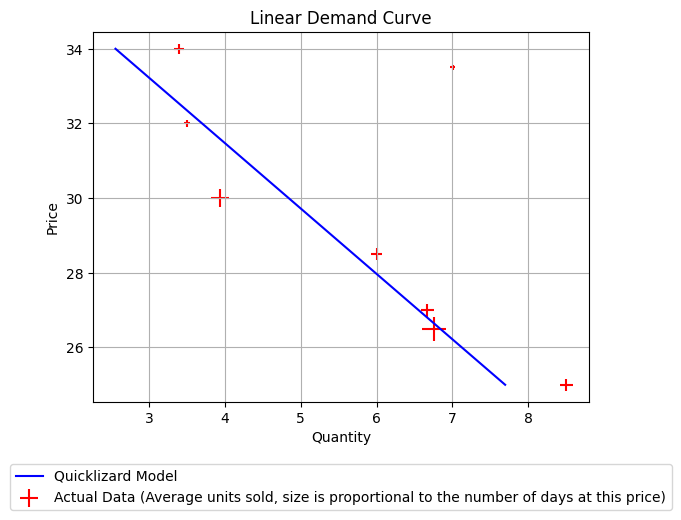

In [89]:
plot_model_and_prices(df_results, df_by_price, 'mi8kd0ke3ijuq1flepr31konflqjlm4t', title='')

uid: a3o2otstpn2c6991l22bv80fs5ab1vua


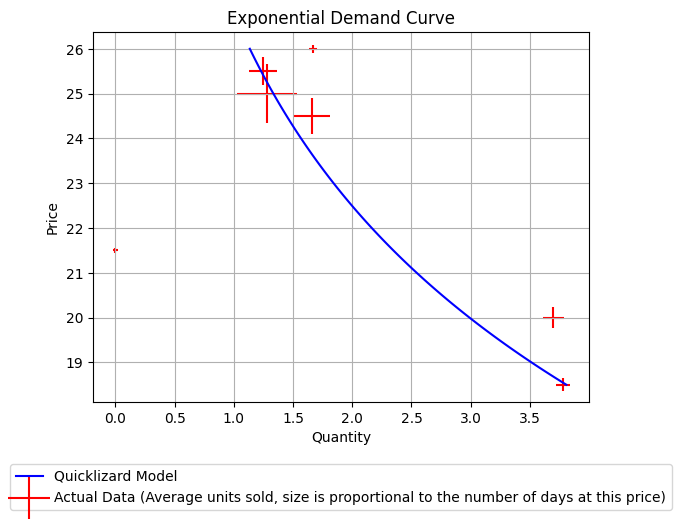

In [90]:
plot_model_and_prices(df_results, df_by_price, 'a3o2otstpn2c6991l22bv80fs5ab1vua', title='')

uid: 1cfc5ge910g0qejvnpd7gbv4uqosbdds


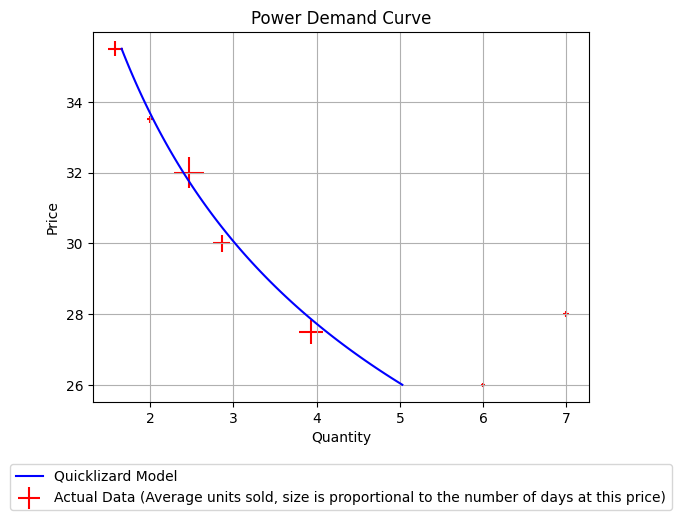

In [91]:
plot_model_and_prices(df_results, df_by_price, '1cfc5ge910g0qejvnpd7gbv4uqosbdds', title='')

In [26]:
df_results[df_results.uid=='1cfc5ge910g0qejvnpd7gbv4uqosbdds']

,linear_mean_relative_error,linear_mean_a,linear_mean_b,linear_mean_elasticity,linear_mean_r2,linear_a,linear_b,linear_pvalue,linear_r2,linear_elasticity,...,best_model,best_model_a,best_model_b,best_model_r2,best_mean_relative_error,best_model_elasticity,median_quantity,median_price,quality_test,uid
0,13.386,13.279,-0.336,-3.157,0.772,13.308,-0.337,0.010,0.767,-3.160,...,power,13.226,-3.564,0.913,8.496,-3.560,2.858,30.000,True,1cfc5ge910g0qejvnpd7gbv4uqosbdds


typo in model type, power, exponential or linear


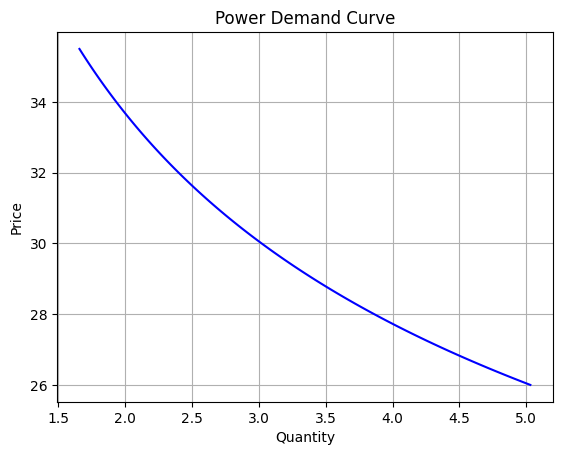

In [27]:
plot_ex('1cfc5ge910g0qejvnpd7gbv4uqosbdds')

UID: mi8kd0ke3ijuq1flepr31konflqjlm4t
linear_mean_relative_error                                    4.775
linear_mean_a                                                22.107
linear_mean_b                                                -0.575
linear_mean_elasticity                                       -3.337
linear_mean_r2                                                0.769
linear_a                                                     21.956
linear_b                                                     -0.570
linear_pvalue                                                 0.003
linear_r2                                                     0.785
linear_elasticity                                            -3.170
power_mean_relative_error                                     6.404
power_mean_a                                                 12.236
power_mean_b                                                 -3.151
power_mean_elasticity                                        -3.150
power_mean

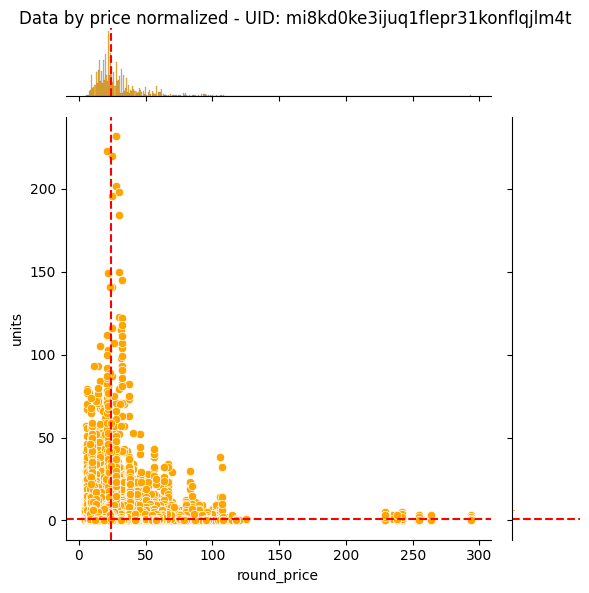

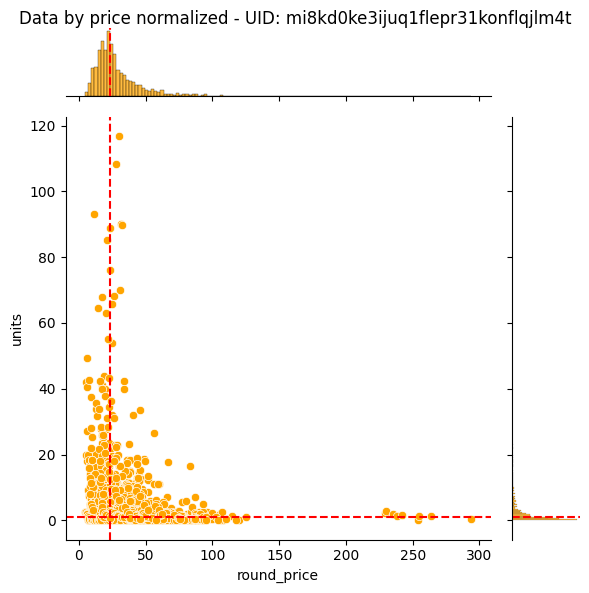

In [27]:
import elasticity.utils.elasticity_plotter as elasticity_plotter
uid_to_plot = ['mi8kd0ke3ijuq1flepr31konflqjlm4t']
for uid in uid_to_plot:
    print(f"UID: {uid}")
    print(df_results[df_results.uid==uid].iloc[0])
    elasticity_plotter.ElasticityPlotter(price_col='round_price').plot_curves(df, uid=uid)
    elasticity_plotter.ElasticityPlotter(price_col='round_price').plot_curves(df_by_price, uid=uid)

In [17]:
uid_to_plot = ['mi8kd0ke3ijuq1flepr31konflqjlm4t']

UID: mi8kd0ke3ijuq1flepr31konflqjlm4t


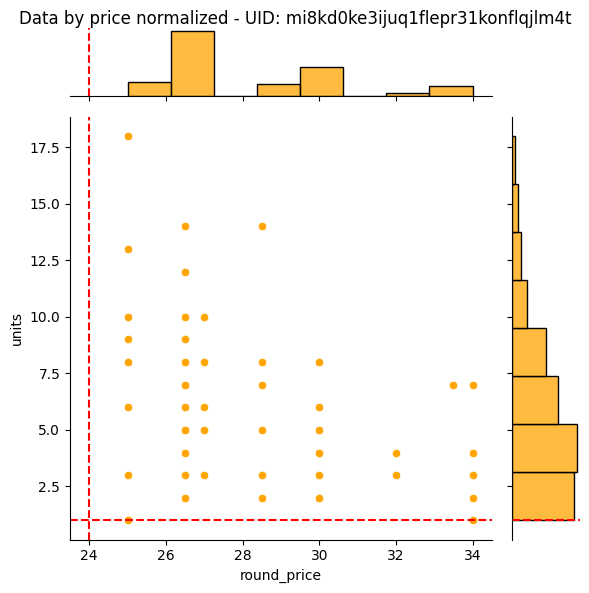

In [20]:
for uid in uid_to_plot:
    print(f"UID: {uid}")
    elasticity_plotter.ElasticityPlotter(price_col='round_price').plot_curves_by_price_norm(df, uid=uid)